* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2023 </i></pre>
***
Work by: Jakob Lamber <br> 
With guidance from: Hicham Janati
* * *


<h1 align="center"> Graphs and networks in machine learning  </h1>

* * *





# Part I: Basic Networking

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Understanding Graphs:
Positions are generated randomly;
we are not giving cords for the vertices
***
NOTE: Relation between nodes is the most important thing in graphs- not length.

### Adding data as arg to edges (example)

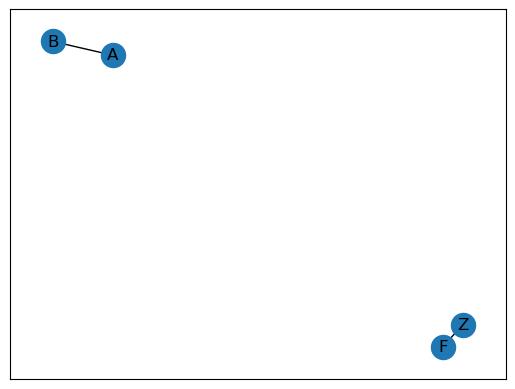

In [6]:
G = nx.Graph()

G.add_edge("F", "Z", weight=15., somedata=403, someotherdata="somevalue", eleke=4404.)
G.add_edge("A", "B", weight=10., somedata=300, someotherdata="someothervalue")

nx.draw_networkx(G)

This additional data can be obtained from the edge:

In [7]:
# This gives you the dictionary
G.get_edge_data("F", "Z")

{'weight': 15.0,
 'somedata': 403,
 'someotherdata': 'somevalue',
 'eleke': 4404.0}

As well as for all the edges and a specific variable:

In [8]:
nx.get_edge_attributes(G, "somedata")

{('F', 'Z'): 403, ('A', 'B'): 300}

### Graphing the relationship between Paris train lines
Here we are creating a graph `M` where the nodes are the stations in the image above. All edges will have a `time` and `distance`the time (mn) and distance (meters) conventions:
- metro change: 1 | 100
- metro-metro: 2 | 1500
- RER-RER: 2 | 2000
- RER change: 4 | 200

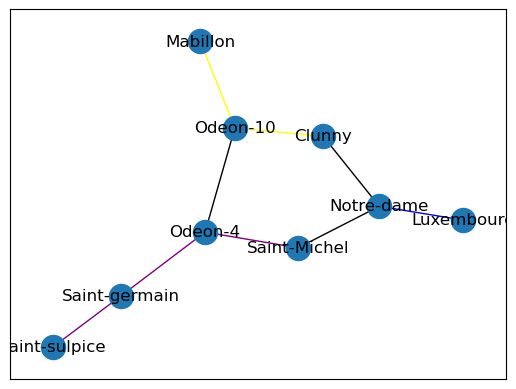

In [9]:
M = nx.Graph()

M.add_edge("Saint-Michel","Odeon-4", time=2,distance=1500, color="purple", closeness=2)
M.add_edge("Saint-Michel","Notre-dame", time=4, distance=200,color="black",closeness=8)
M.add_edge("Clunny","Odeon-10",time=2,distance=1500,color="yellow",closeness=2)
M.add_edge("Odeon-10","Mabillon",time=2,distance=1500,color="yellow",closeness=2)
M.add_edge("Notre-dame","Clunny",time=4,distance=200,color="black",closeness=8)
M.add_edge("Notre-dame","Luxembourg",time=2,distance=2000,color="blue",closeness=10)
M.add_edge("Saint-germain","Odeon-4",time=2,distance=1500,color="purple",closeness=2)
M.add_edge("Odeon-4","Odeon-10",time=1,distance=100,color="black",closeness=10)
M.add_edge("Saint-germain", "Saint-sulpice",time=2,distance=15000,color="purple",closeness=2)
# Loop over all edges and grab their color attribute
colors = [M[u][v]["color"] for u, v in M.edges()]

# Draw with edge colors in mind
nx.draw_networkx(M, edge_color=colors)

### Computing the shortest path by length and time between two stations.

In [11]:
shortest_path = (nx.shortest_path_length(M, 'Saint-germain','Clunny', weight="time"))
print(f"The shortest path from Saint-Germain to Clunny is {shortest_path} minutes") 
print("\nThat path is: ")
path = nx.shortest_path(M, "Saint-germain", "Clunny")
for i, stop in enumerate(path):
    print(f"{i+1}. {stop}")

print("\n---------------------------------")
shortest_path = (nx.shortest_path_length(M, 'Saint-germain','Clunny', weight="distance"))
print(f"The shortest path from Saint-Germain to Clunny is {shortest_path} meters") 
print("\nThat path is: ")
path = nx.shortest_path(M, "Saint-germain", "Clunny")
for i, stop in enumerate(path):
    print(f"{i+1}. {stop}")

The shortest path from Saint-Germain to Clunny is 5 minutes

That path is: 
1. Saint-germain
2. Odeon-4
3. Odeon-10
4. Clunny

---------------------------------
The shortest path from Saint-Germain to Clunny is 3100 meters

That path is: 
1. Saint-germain
2. Odeon-4
3. Odeon-10
4. Clunny


### Breaking down edge length representations of the data (example)

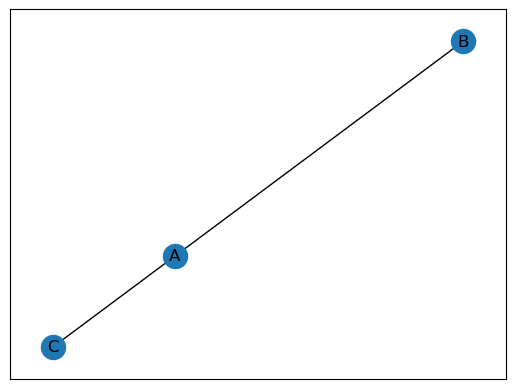

In [12]:
G = nx.Graph()

G.add_edge("A", "B", somedata=10, somedata_inv=1/10.)
G.add_edge("A", "C", somedata=1, somedata_inv=1.)

positions = nx.spring_layout(G, weight="somedata_inv")
nx.draw_networkx(G, positions)

### Applying this to the graph

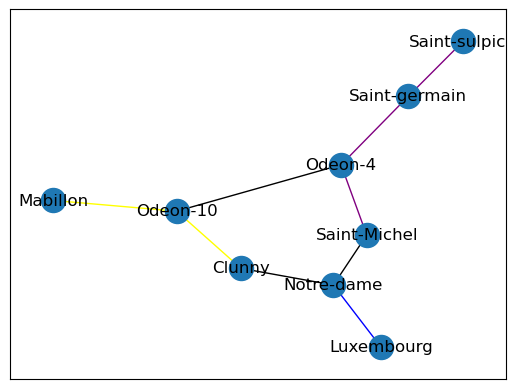

In [13]:
M_updated = nx.Graph()

M_updated.add_edge("Saint-Michel","Odeon-4", time=2,distance=1500, color="purple")
M_updated.add_edge("Saint-Michel","Notre-dame", time=4, distance=200,color="black")
M_updated.add_edge("Clunny","Odeon-10",time=2,distance=1500,color="yellow")
M_updated.add_edge("Odeon-10","Mabillon",time=2,distance=1500,color="yellow")
M_updated.add_edge("Notre-dame","Clunny",time=4,distance=200,color="black")
M_updated.add_edge("Notre-dame","Luxembourg",time=2,distance=2000,color="blue")
M_updated.add_edge("Saint-germain","Odeon-4",time=2,distance=1500,color="purple")
M_updated.add_edge("Odeon-4","Odeon-10",time=1,distance=100,color="black")
M_updated.add_edge("Saint-germain", "Saint-sulpice",time=2,distance=15000,color="purple")
#loop over all edges
colors = [M[u][v]["color"] for u, v in M_updated.edges()]
distances = [M[u][v]["distance"] for u, v in M_updated.edges()]


positions = nx.spring_layout(M_updated, weight="time")

nx.draw_networkx(M_updated, positions,edge_color=colors)
#nx.draw_networkx_edge_labels(M_updated,positions, edge_color=colors)

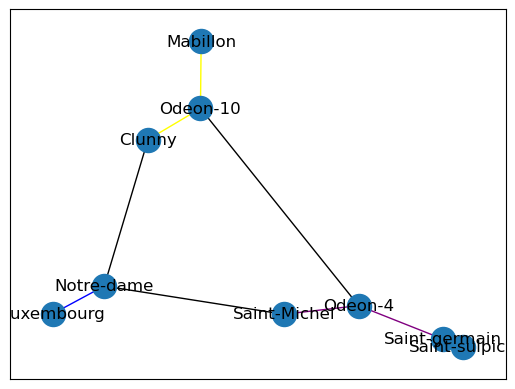

In [14]:
M_updated2 = nx.Graph()

M_updated2.add_edge("Saint-Michel","Odeon-4", time=2,distance=1500, color="purple")
M_updated2.add_edge("Saint-Michel","Notre-dame", time=4, distance=200,color="black")
M_updated2.add_edge("Clunny","Odeon-10",time=2,distance=1500,color="yellow")
M_updated2.add_edge("Odeon-10","Mabillon",time=2,distance=1500,color="yellow")
M_updated2.add_edge("Notre-dame","Clunny",time=4,distance=200,color="black")
M_updated2.add_edge("Notre-dame","Luxembourg",time=2,distance=2000,color="blue")
M_updated2.add_edge("Saint-germain","Odeon-4",time=2,distance=1500,color="purple")
M_updated2.add_edge("Odeon-4","Odeon-10",time=1,distance=100,color="black")
M_updated2.add_edge("Saint-germain", "Saint-sulpice",time=2,distance=15000,color="purple")
# Loop over all edges
colors = [M[u][v]["color"] for u, v in M_updated2.edges()]

positions = nx.spring_layout(M_updated2, weight="distance")

nx.draw_networkx(M_updated2, positions,edge_color=colors)

Visually we can see that the first graph does not make sense for our data but the second does. This is because of the way that weight is taken into account: it visually represents an inverse length to weight. 
***
Therefore, we can make another attribute named closeness which more or less represents this relationship in a way that is better suited for a visual representation.

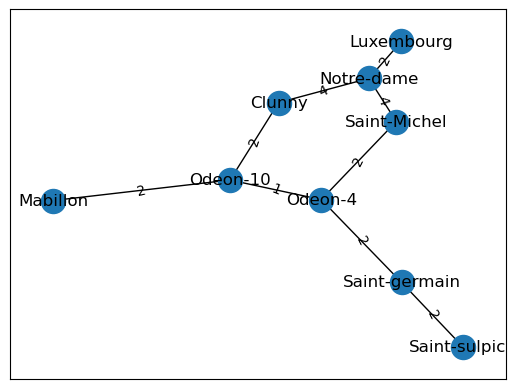

In [15]:
positions = nx.spring_layout(M, weight="closeness")
edge_data = nx.get_edge_attributes(M, 'time')
nx.draw_networkx_edge_labels(M,positions,edge_data)
nx.draw_networkx(M,positions)



# New Representations of Signifigance 

### Betweeness Centrality
The shortest path between nodes can be used to define the concept of betweeness centrality of an edge. An edge has high _betweeness centrality_ if among all possible shortest paths between _all_ the nodes of the graph
a large proportion includes it. Under this definition, you can see how an edge with a high betweeness centrality is similar to a bridge between communities! It is the road taken most often between the two cities.

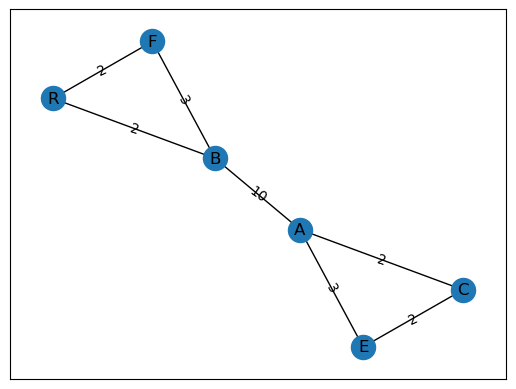

In [19]:
G = nx.Graph()

G.add_edge("A", "B", somedata=10)
G.add_edge("A", "C", somedata=2)

G.add_edge("A", "E", somedata=3)
G.add_edge("E", "C", somedata=2)

G.add_edge("B", "F", somedata=3)
G.add_edge("B", "R", somedata=2)
G.add_edge("F", "R", somedata=2)

positions = nx.spring_layout(G, weight="somedata")

edge_data = nx.get_edge_attributes(G, "somedata")
nx.draw_networkx_edge_labels(G, positions, edge_data)
nx.draw_networkx(G, positions)

In [17]:
nx.betweenness_centrality(G, weight="somedata")

{'A': 0.6000000000000001,
 'B': 0.6000000000000001,
 'C': 0.0,
 'E': 0.0,
 'F': 0.0,
 'R': 0.0}

### Node importance
The importance (or degree) of a node can be defined as the total number of edges (weighted or not) it has. To represent this better we can make the node size change through a measure of importance.

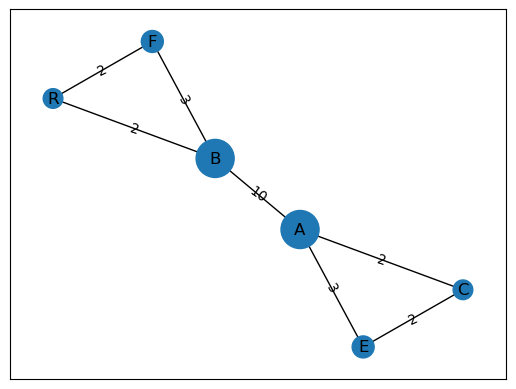

In [20]:
importance = dict(G.degree(weight="somedata"))
nodelist = list(importance.keys())
sizes = 50 * np.array([importance[key] for key in nodelist])
nx.draw_networkx_edge_labels(G, positions, edge_data)
nx.draw_networkx(G, positions, nodelist=nodelist, node_size=sizes)

In [21]:
importance = dict(G.degree(weight='somedata'))
importance

{'A': 15, 'B': 15, 'C': 4, 'E': 5, 'F': 5, 'R': 4}

# Part II: Game of Thrones Representations
Here we are going to take a dataset of Game of Thrones characters and weights defined by the amount that they are mentioned within 15 words of other characters. This weighted measure can help us identify important characters and communities based on the preceding concepts we defined above.

In [22]:
import pandas as pd
df = pd.read_csv("https://aiteachings.github.io/NYU-AI-Fall23/static_files/data/got/asoiaf-book1-edges.csv")
df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [23]:
def got_graph(book_id):
    df = pd.read_csv(f"https://aiteachings.github.io/NYU-AI-Fall23/static_files/data/got/asoiaf-book{book_id}-edges.csv")
    df["weight_inv"] = 1/df.weight * 1000.
    graph = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr=['weight', 'weight_inv'])
    return graph

graph = got_graph(1)

In [24]:
graph.edges

EdgeView([('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Jaime-Lannister', 'Aerys-II-Targaryen'), ('Jaime-Lannister', 'Barristan-Selmy'), ('Jaime-Lannister', 'Brynden-Tully'), ('Jaime-Lannister', 'Catelyn-Stark'), ('Jaime-Lannister', 'Cersei-Lannister'), ('Jaime-Lannister', 'Eddard-Stark'), ('Jaime-Lannister', 'Edmure-Tully'), ('Jaime-Lannister', 'Galbart-Glover'), ('Jaime-Lannister', 'Gregor-Clegane'), ('Jaime-Lannister', 'Harys-Swyft'), ('Jaime-Lannister', 'Joffrey-Baratheon'), ('Jaime-Lannister', 'Jon-Arryn'), ('Jaime-Lannister', 'Jory-Cassel'), ('Jaime-Lannister', 'Kevan-Lannister'), ('Jaime-Lannister', 'Loras-Tyrell'), ('Jaime-Lannister', 'Lysa-Arryn'), ('Jaime-Lannister', 'Petyr-Baelish'), ('Jaime-Lannister', 'Renly-Baratheon'), ('Jaime-Lannister', 'Rickard-Karstark'), ('Jaime-Lannister', 'Robb-Stark'), ('Jaime-Lannister', 'Robert-Baratheon'), ('Jaime-Lannister', 'Rodrik-Cassel'), ('Jaime-Lannister', 'Sandor-Clegane'), ('Jaime-Lannister', 'Sansa-S

### Using Importance to find the top 10 important characters

In [25]:
importance_characters = dict(graph.degree(weight='weight'))
importance_characters
# This sorts and extracts top 10 most important characters by degree
sort_by_value = dict(sorted(importance_characters.items(), key=lambda item: item[1], reverse=True)[:10])
print("Top ten most important characters!")
for i, person in enumerate(sort_by_value, start=1):
    print(f"{i}. {person}")


Top ten most important characters!
1. Eddard-Stark
2. Robert-Baratheon
3. Jon-Snow
4. Tyrion-Lannister
5. Sansa-Stark
6. Bran-Stark
7. Catelyn-Stark
8. Robb-Stark
9. Daenerys-Targaryen
10. Arya-Stark


### Visualization

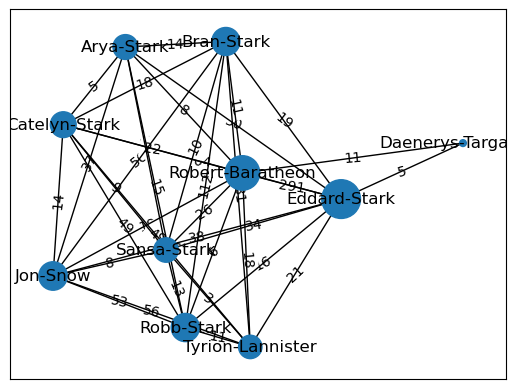

In [26]:
# Use list of keys to make a subgraph of our already created graph
top_characters = list(sort_by_value.keys())
subgraph = graph.subgraph(top_characters)

# Want to make a dictionary with all their importance values which is determined by the weight
importance_subgraph = dict(subgraph.degree(weight="weight"))

# All the nodes
nodelist = list(importance_subgraph.keys())
# Scale for size of nodes so they are big relative to their importance
sizes = 1.5 * np.array([importance_subgraph[node] for node in subgraph.nodes()])

positions = nx.spring_layout(subgraph, weight = "weight_inv")
edge_data = nx.get_edge_attributes(subgraph, "weight")


nx.draw_networkx_edge_labels(subgraph, positions, edge_data)
nx.draw_networkx(subgraph, positions, nodelist=nodelist, node_size=sizes)

### Reading from the five books and tracking the evolution of important characters

In [27]:
def top_ten(graph):
    importance_characters = dict(graph.degree(weight='weight'))
    #print(importance_characters)
    sort_by_value = dict(sorted(importance_characters.items(), key=lambda item: item[1], reverse=True)[:10])
    for i, person in enumerate(sort_by_value):
        print(f"{i+1}. {person}")


In [56]:
for i in range(5):
    print(f"Top Ten Most Important Characters in Book {i+1}")
    new_graph = got_graph(i+1)
    top_ten(new_graph)
    print("\n\n")

Top Ten Most Important Characters in Book 1
1. Eddard-Stark
2. Robert-Baratheon
3. Jon-Snow
4. Tyrion-Lannister
5. Sansa-Stark
6. Bran-Stark
7. Catelyn-Stark
8. Robb-Stark
9. Daenerys-Targaryen
10. Arya-Stark



Top Ten Most Important Characters in Book 2
1. Tyrion-Lannister
2. Joffrey-Baratheon
3. Cersei-Lannister
4. Bran-Stark
5. Stannis-Baratheon
6. Arya-Stark
7. Jon-Snow
8. Renly-Baratheon
9. Robb-Stark
10. Catelyn-Stark



Top Ten Most Important Characters in Book 3
1. Tyrion-Lannister
2. Jon-Snow
3. Joffrey-Baratheon
4. Jaime-Lannister
5. Sansa-Stark
6. Robb-Stark
7. Arya-Stark
8. Samwell-Tarly
9. Cersei-Lannister
10. Catelyn-Stark



Top Ten Most Important Characters in Book 4
1. Cersei-Lannister
2. Jaime-Lannister
3. Tommen-Baratheon
4. Margaery-Tyrell
5. Brienne-of-Tarth
6. Samwell-Tarly
7. Tyrion-Lannister
8. Petyr-Baelish
9. Arianne-Martell
10. Sansa-Stark



Top Ten Most Important Characters in Book 5
1. Jon-Snow
2. Daenerys-Targaryen
3. Tyrion-Lannister
4. Stannis-Baratheo

It makes sense that the Starks start out as the most important characters and then after Ed dies and the Starks move out of the picture for other story lines to develop in the next books we can see that here. The main characters in the books align with how it was - in the show at least - portrayed.

### Now we use our other identifier of signifigance - Betweeness Centrality

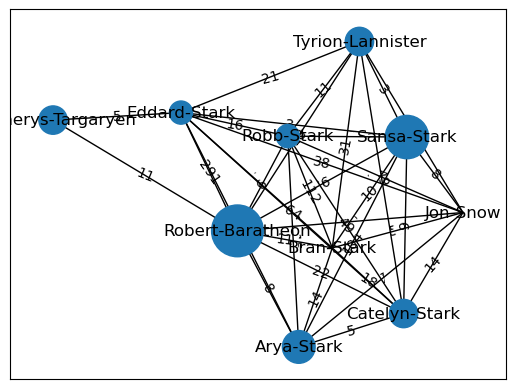

In [28]:
def make_subgraph(graph, sort_by_value, scale=5000):
    # Use list of keys to make a subgraph of our already created graph
    top_characters = list(sort_by_value.keys())
    subgraph = graph.subgraph(top_characters)

    # Calculate betweeness
    between = (nx.betweenness_centrality(subgraph, weight="weight"))

    # All the nodes
    nodelist = list(between.keys())  
    # Scale for size of nodes so they are big relative to their importance
    sizes = scale * np.array([v for v in between.values()])


    positions = nx.spring_layout(subgraph, weight = "weight_inv")
    edge_data = nx.get_edge_attributes(subgraph, "weight")


    nx.draw_networkx_edge_labels(subgraph, positions, edge_data)
    nx.draw_networkx(subgraph, positions, nodelist=nodelist, node_size=sizes)

make_subgraph(graph,sort_by_value)

It makes sense to use 'weight' here in order to show how important different characters are in relation to others, i.e. through a metric like betweeness centrality. We can see here that Robert-Baratheon is often used to connect different characters through this representation of the data.

In [29]:
def top_ten_between(subgraph):
    between = (nx.betweenness_centrality(subgraph, weight="weight"))
    sort_by_value = dict(sorted(between.items(), key=lambda item: item[1], reverse=True)[:10])
    for i, person in enumerate(sort_by_value):
        print(f"{i+1}. {person}")
#top_ten_between(graph)

In [30]:
for i in range(5):
    print(f"Top Ten Most Important Characters by Betweenness Centrality in Book {i+1}")
    new_graph = got_graph(i+1)
    top_ten_between(new_graph)
    print("\n\n")

Top Ten Most Important Characters by Betweenness Centrality in Book 1
1. Robert-Baratheon
2. Eddard-Stark
3. Tyrion-Lannister
4. Robb-Stark
5. Catelyn-Stark
6. Jon-Snow
7. Jaime-Lannister
8. Rodrik-Cassel
9. Drogo
10. Jorah-Mormont



Top Ten Most Important Characters by Betweenness Centrality in Book 2
1. Jaime-Lannister
2. Robert-Baratheon
3. Jon-Snow
4. Arya-Stark
5. Robb-Stark
6. Theon-Greyjoy
7. Stannis-Baratheon
8. Catelyn-Stark
9. Joffrey-Baratheon
10. Tyrion-Lannister



Top Ten Most Important Characters by Betweenness Centrality in Book 3
1. Joffrey-Baratheon
2. Robert-Baratheon
3. Jon-Snow
4. Stannis-Baratheon
5. Catelyn-Stark
6. Jaime-Lannister
7. Tyrion-Lannister
8. Robb-Stark
9. Sansa-Stark
10. Daenerys-Targaryen



Top Ten Most Important Characters by Betweenness Centrality in Book 4
1. Stannis-Baratheon
2. Balon-Greyjoy
3. Jaime-Lannister
4. Baelor-Blacktyde
5. Cersei-Lannister
6. Tyrion-Lannister
7. Sansa-Stark
8. Arya-Stark
9. Samwell-Tarly
10. Tywin-Lannister



Top T

Again analyzing the data by betweeness centrality similarly reflects important characters in the story. However, here we can see that it has a bias towards characters that bring together specific communities. This makes sense with this data.

# Community Visualization 
Here we use the Girvan Newman algorithm in order to visualize the graph of each community (top 5 important characters of each community).
This is done by finding edges that are used often to connect sets of tightly related nodes and removing them. This leaves subgraphs of 'communities'.

In [35]:
from networkx.algorithms.community.centrality import girvan_newman

In [36]:
def top_between(subgraph, j):
    between = (nx.betweenness_centrality(subgraph, weight="weight"))
    sort_by_value = dict(sorted(between.items(), key=lambda item: item[1], reverse=True)[:j])
    for i, person in enumerate(sort_by_value):
        print(f"{i+1}. {person}")
    return sort_by_value
#top_ten_between(graph)

In [37]:
def top_between_and_visualize(community_subgraph, scale=5000):
    # Calculate betweenness centrality and sort
    betweenness = nx.betweenness_centrality(community_subgraph, weight="weight")
    sorted_betweenness = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5]

    # Print top 5 nodes
    print("Top 5 important characters in this community:")
    for i, (node, centrality) in enumerate(sorted_betweenness):
        print(f"{i+1}. {node} (Centrality: {centrality:.2f})")

    # Visualization
    plt.figure(figsize=(5, 5))
    positions = nx.spring_layout(community_subgraph, weight = "weight_inv")

    # Node sizes based on betweenness centra]lity
    node_sizes = [betweenness[node] * scale if node in dict(sorted_betweenness) else 100 for node in community_subgraph.nodes()]

    nx.draw(community_subgraph, positions, with_labels=True, node_size=node_sizes)
    plt.show()

In [39]:
def top_between_and_visualize_five(community_subgraph, scale=5000):
    # Calculate betweenness centrality and sort
    betweenness = nx.betweenness_centrality(community_subgraph, weight="weight")
    sorted_betweenness = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5]

    # Print top 5 nodes
    print("Top 5 important characters in this community (Based on Betweeness Centrality):")
    top_nodes = []
    for i, (node, centrality) in enumerate(sorted_betweenness, start=1):
        print(f"{i}. {node} (Centrality: {centrality:.2f})")
        top_nodes.append(node)

    # Create a subgraph with only the top 5 nodes
    top_subgraph = community_subgraph.subgraph(top_nodes)

    # Visualization
    plt.figure(figsize=(5, 5))
    positions = nx.spring_layout(top_subgraph, weight = "weight_inv")  

    # Node sizes for the top subgraph
    node_sizes = [betweenness.get(node, 0) * scale for node in top_subgraph.nodes()]

    nx.draw(top_subgraph, positions, with_labels=True, node_size=node_sizes)
    plt.show()



Community 1:
Top 5 important characters in this community (Based on Betweeness Centrality):
1. Eddard-Stark (Centrality: 0.19)
2. Tyrion-Lannister (Centrality: 0.17)
3. Catelyn-Stark (Centrality: 0.12)
4. Robb-Stark (Centrality: 0.12)
5. Robert-Baratheon (Centrality: 0.10)


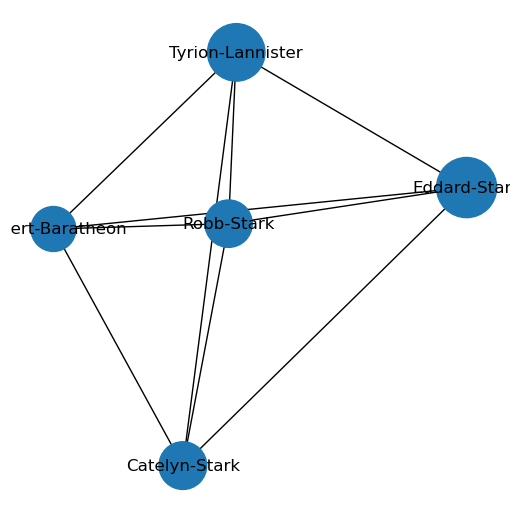


Community 2:
Top 5 important characters in this community (Based on Betweeness Centrality):
1. Drogo (Centrality: 0.46)
2. Quaro (Centrality: 0.19)
3. Daenerys-Targaryen (Centrality: 0.19)
4. Jommo (Centrality: 0.18)
5. Jorah-Mormont (Centrality: 0.16)


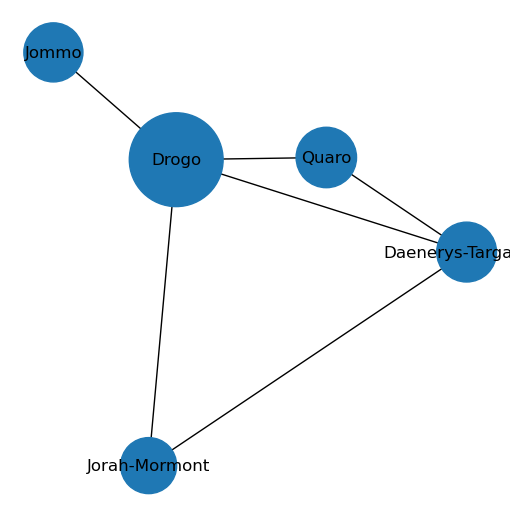

In [40]:
# Communities is now a generator object that we can extract things from
# Each time we call next another edge is removed with the highest betweeness centrality
communities = nx.community.girvan_newman(graph)
first_communities = next(communities)

for i, community in enumerate(first_communities):
    print(f"\nCommunity {i+1}:")
    community_subgraph = graph.subgraph(community)
    top_between_and_visualize_five(community_subgraph, 10000)

In [104]:
def graph_and_visualize_five(community_subgraph, scale=5000):
    # Calculate betweenness centrality and sort
    importance_sub = dict(community_subgraph.degree(weight='weight'))
    # This sorts and extracts top 10 most important characters by degree
    sorted_by_value = dict(sorted(importance_sub.items(), key=lambda item: item[1], reverse=True)[:5])

    # Print top 5 nodes
    print("Top 5 important characters in this community:")
    top_nodes = []
    for i, (node, importance) in enumerate(sorted_by_value.items(), start=1):
        print(f"{i}. {node} (Importance: {importance})")
        top_nodes.append(node)

    # Create a subgraph with only the top 5 nodes
    top_subgraph = community_subgraph.subgraph(top_nodes)
    

    # All the nodes
    nodelist = list(top_nodes)
    # Scale for size of nodes so they are big relative to their importance
    sizes = 1.5 * np.array([importance_sub[node] for node in nodelist])

    positions = nx.spring_layout(top_subgraph, weight = "weight_inv")
    edge_data = nx.get_edge_attributes(top_subgraph, "weight")


    plt.figure(figsize=(5, 5))

    nx.draw_networkx_edge_labels(top_subgraph, positions, edge_data)
    nx.draw_networkx(top_subgraph, positions, nodelist=nodelist, node_size=sizes)


    plt.show()



Community 1:
Top 5 important characters in this community:
1. Eddard-Stark (Importance: 1275)
2. Robert-Baratheon (Importance: 911)
3. Jon-Snow (Importance: 784)
4. Tyrion-Lannister (Importance: 650)
5. Sansa-Stark (Importance: 545)


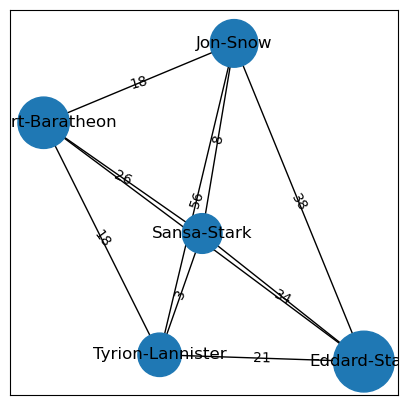


Community 2:
Top 5 important characters in this community:
1. Daenerys-Targaryen (Importance: 418)
2. Drogo (Importance: 253)
3. Jorah-Mormont (Importance: 146)
4. Viserys-Targaryen (Importance: 93)
5. Irri (Importance: 81)


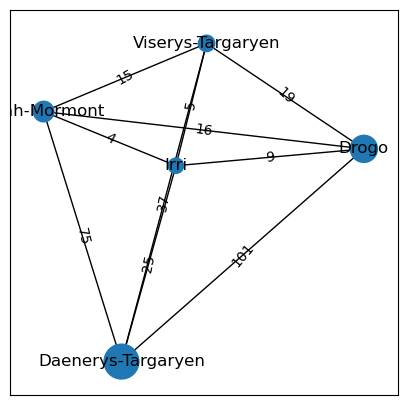

In [105]:
# Communities is now a generator object that we can extract things from
# Each time we call next another edge is removed with the highest betweeness centrality
communities_imp = nx.community.girvan_newman(graph)
first_communities_imp = next(communities_imp)

for i, community in enumerate(first_communities_imp):
    print(f"\nCommunity {i+1}:")
    community_subgraph = graph.subgraph(community)
    graph_and_visualize_five(community_subgraph, 1000)

This community split makes sense in terms of the first book because it clearly shows the two main plotlines. The one with Daenerys and Drogo and on the other side of the narrative, the Starks/Winterfell crew.

There are two functions here. One shows all of the characters present and not only the top. The one active right now only shows the top five but note that there node size is based on betweeness centrality in the whole set.

The function below those two is plotting the top five most important based on degree and not betweeness centrality like I did in the other graphs.